In [1]:
# @formatter:off
%load_ext autoreload
%autoreload 2
# @formatter:on

In [2]:
import numpy as np
from PIL import Image
from chemgrid_game.chemistry.utils import create_unit_mol
from chemgrid_game.plotting import plot_mols
from matplotlib import pyplot as plt

from experiments.chemgrid_experiments.backend_agents import planner
from experiments.chemgrid_experiments.backend_agents import policies
from experiments.chemgrid_experiments.backend_agents.game_backend_wrapper import GameBackendWrapper
from experiments.chemgrid_experiments.backend_agents.planning_utils import ExperimentRunner
from experiments.chemgrid_experiments.backend_agents.planning_utils import generate_random_mols
from experiments.chemgrid_experiments.graph_search import graph_generation
from experiments.chemgrid_experiments.graph_search.search import GraphSearchHeuristic

In [3]:
n_agents = 4
mol_size = 16
grid_size = 6
n_colors = 1

rng = np.random.default_rng(seed=0)

# Inventories

In [4]:
mols = generate_random_mols(n_agents, mol_size=4, rng=rng, n_colors=n_colors, grid_size=grid_size)
inventories = [create_unit_mol(i + 1, grid_size=grid_size) for i in range(n_colors)]
inventories = [inventories for _ in range(n_agents)]
inventories = [[m] for m in mols]

inventory 0


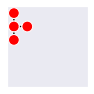

inventory 1


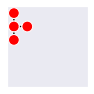

inventory 2


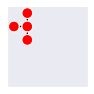

inventory 3


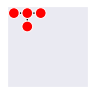

In [5]:
for i, inventory in enumerate(inventories):
    print(f"inventory {i}")
    fig, axs = plot_mols(inventory, m=1, n=len(inventory), scale=0.2, background=True)

# Targets

In [6]:
target_mols = generate_random_mols(n_agents, mol_size, rng, n_colors=n_colors, grid_size=grid_size)

target 0


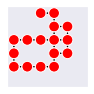

target 1


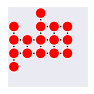

target 2


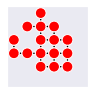

target 3


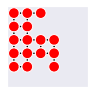

In [7]:
for i, target in enumerate(target_mols):
    print(f"target {i}")
    fig, ax = plot_mols(target, m=1, scale=0.2, background=True)

# Experiment

In [11]:
search_params = dict(
    use_tqdm=False,
    target_match_weight=0.1,
    return_best_if_fail=True,
    max_inventory_size=1000,
    n_steps=20000
)

policy_params = dict(logger_level="INFO", contract_th=0)

experiment = ExperimentRunner(
    planner_class=planner.Planner,
    search_class=GraphSearchHeuristic,
    search_params=search_params,
    policy_class=policies.FuturePlanPolicy,
    policy_params=policy_params,
    env_class=GameBackendWrapper,
    max_steps=15,
    target_mols=target_mols,
    inventories=inventories
)

history = experiment.run()

{'contract': 0.75, 'join': 10.25, 'break': 0.75, 'noop': 3.25, 'n_agents': 4}
Saving graph to C:\Users\kepes\PycharmProjects\chemgrid_experiments\experiments\files\graphs
Saving graph to C:\Users\kepes\PycharmProjects\chemgrid_experiments\experiments\files\graphs
Saving graph to C:\Users\kepes\PycharmProjects\chemgrid_experiments\experiments\files\graphs
Saving graph to C:\Users\kepes\PycharmProjects\chemgrid_experiments\experiments\files\graphs


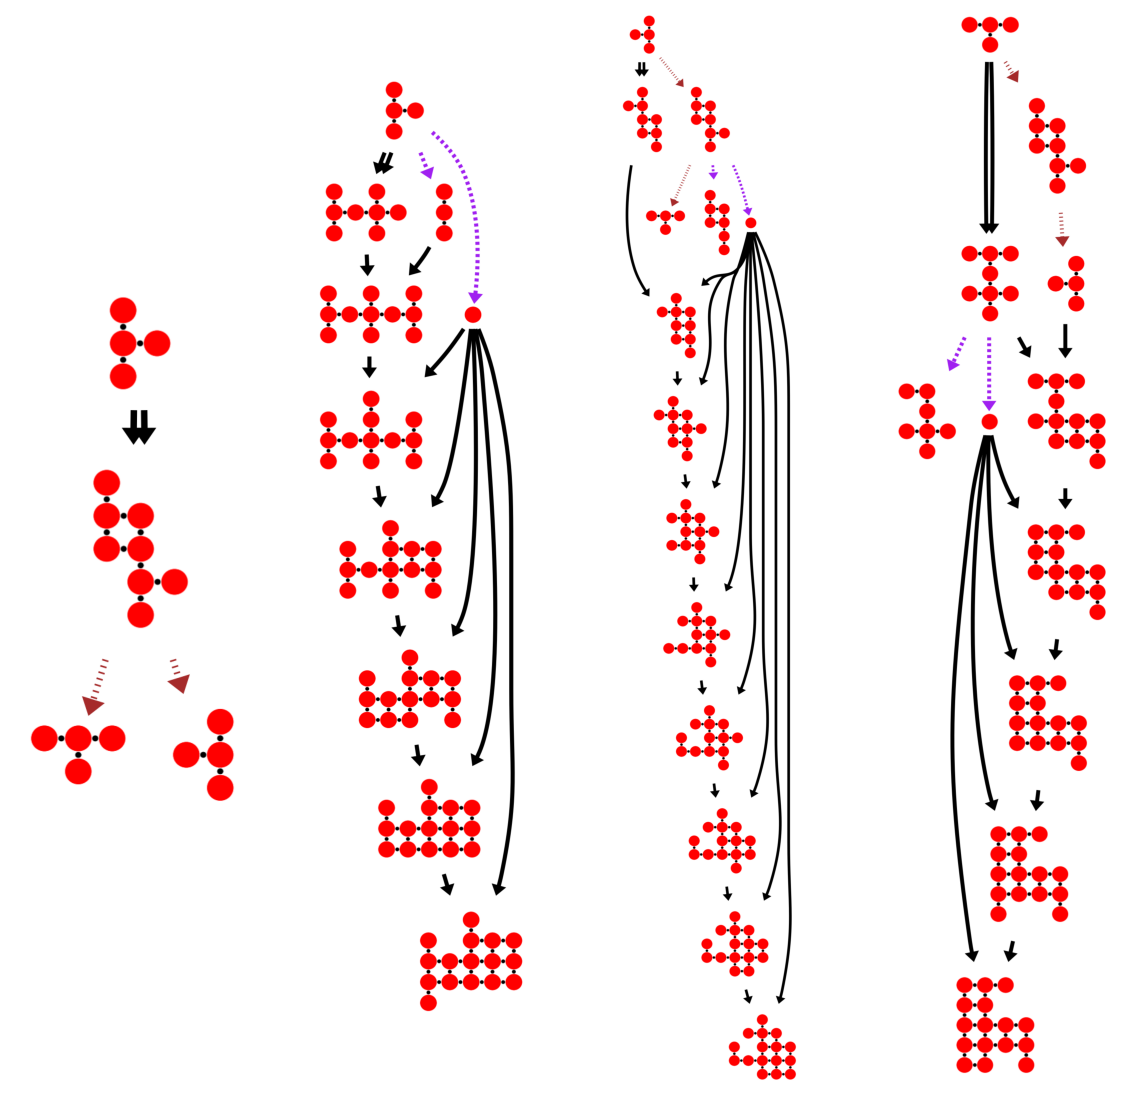

In [12]:
print(history.get_history_stats())

seqs = [history.get_build_history(i, archive=experiment.policy.archive) for i in range(history.n_agents)]
ps = [graph_generation.save_graph_to_img(graph_generation.seq_to_graph(seq)) for seq in seqs]

fig, axs = plt.subplots(1, len(ps), figsize=(20, 20))

for p, ax in zip(ps, axs.flatten()):
    with Image.open(p) as im:
        ax.imshow(im)
        ax.set_axis_off()

plt.show()

In [13]:
df = history.to_df()
for i in range(n_agents):
    print(df[f"agent_{i}"].drop(columns=["new_inventory", "new_contracts", "build_history"]))

       inventory  target                 contracts                    action  \
0            [0]       1                        []  (contract, [6, 3], None)   
1            [0]       1  [(2, 3), (4, 3), (5, 6)]  (join, [0, 0], (-2, -1))   
2   [0, 3, 7, 6]       1  [(2, 3), (4, 3), (5, 6)]          (noop, [], None)   
3   [0, 3, 7, 6]       1  [(2, 3), (4, 3), (5, 6)]          (noop, [], None)   
4   [0, 3, 7, 6]       1  [(2, 3), (4, 3), (5, 6)]          (noop, [], None)   
5   [0, 3, 7, 6]       1  [(2, 3), (4, 3), (5, 6)]          (noop, [], None)   
6   [0, 3, 7, 6]       1  [(2, 3), (4, 3), (5, 6)]          (noop, [], None)   
7   [0, 3, 7, 6]       1  [(2, 3), (4, 3), (5, 6)]          (noop, [], None)   
8   [0, 3, 7, 6]       1  [(2, 3), (4, 3), (5, 6)]          (noop, [], None)   
9   [0, 3, 7, 6]       1  [(2, 3), (4, 3), (5, 6)]          (noop, [], None)   
10  [0, 3, 7, 6]       1  [(2, 3), (4, 3), (5, 6)]          (noop, [], None)   
11  [0, 3, 7, 6]       1  [(2, 3), (4, 3